# Organized Presentation Notebook For Graph Clustering Algorithms

## CSE 514A Data Mining Final Project

This notebook is in written in Python 3 with the NetworkX library for handling graphs. The project also uses the Snap library for heavier computations. Networkx is written in Python, whereas Snap is written in C, so we use C for large graph and computationally intensive tasks like betweeness clustering.


### Email Graph
* __Nodes : 1005__
* __Edges : 25571__
* __Communities : 42__
* __Diameter : 7__


## Step 1) Load Data

### 1.1 Load Graph $G_{karate}=(V,E)$  |  Ground Truth Community Labels are provided in 'club' attribute

In [1]:
import os
import util
import warnings
import numpy as np
import pandas as pd
import networkx as nx
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

warnings.filterwarnings('ignore')

# Load Karate Club Graph Data
G_karate = nx.karate_club_graph()
print('Email # of nodes -', G_karate.number_of_nodes())
print('Email # of edges -', G_karate.number_of_edges())
print('Email LCC avg path length -', nx.average_shortest_path_length(G_karate))

avg_clustering = nx.average_clustering(G_karate)
print('Email avg clustering coef -', avg_clustering)

ground_truth_labels = np.zeros(len(G_karate), dtype=np.dtype('i1'))
for node in G_karate:
    ground_truth_labels[node] = 0 if G_karate.nodes[node]['club'] == 'Mr. Hi' else 1
ground_truth_communities = util.convert_labels_to_communities(ground_truth_labels)
print('\nGround truth communities:\n', ground_truth_communities)
print('\nGround truth labels:')
ground_truth_labels

Email # of nodes - 34
Email # of edges - 78
Email LCC avg path length - 2.408199643493761
Email avg clustering coef - 0.5706384782076823

Ground truth communities:
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21], [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

Ground truth labels:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

### 1.3 Precompute Graph Positional Layout For Visualization Efficiency

In [2]:
karate_pos = nx.spring_layout(G_karate, k=0.3*1/np.sqrt(G_karate.number_of_nodes()))

# Step 2) Ground Truth Visualizations

    Visualizations were cut out of this notebook

# Step 3) Graph Statistics

## 3.1 Summary Statistics

In [3]:
print('Email # of nodes -', G_karate.number_of_nodes())
print('Email # of edges -', G_karate.number_of_edges())
print('Email LCC avg path length -', nx.average_shortest_path_length(G_karate))
print('Email avg clustering coef -', nx.average_clustering(G_karate))

Email # of nodes - 34
Email # of edges - 78
Email LCC avg path length - 2.408199643493761
Email avg clustering coef - 0.5706384782076823



 Attribute | Value
------------ | ------------- 
Number of Employees (Nodes) | 1005
Number of Emails Sent (Edges) | 25571 
LCC Avg Path Length | 2.54748 
Avg Clustering Coef | 0.36566

## 3.2 High Centrality Nodes

### 3.2.1 Degree Centrality

In [4]:
print('Top 10 Nodes by Degree Centrality:')
sorted(nx.degree_centrality(G_karate).items(), key=lambda x: x[1], reverse=True)[:10]

Top 10 Nodes by Degree Centrality:


[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

In [5]:
# util.draw(G_karate, karate_pos, nx.degree_centrality(G_karate), 'Degree Centrality')

### 3.2.2 Betweeness Centrality

In [6]:
print('Top 10 Nodes by Betweeness Centrality:')
sorted(nx.betweenness_centrality(G_karate).items(), key=lambda x: x[1], reverse=True)[:10]

Top 10 Nodes by Betweeness Centrality:


[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

### 3.2.3 Closeness Centrality

In [7]:
print('Top 10 Nodes by Closeness Centrality:')
sorted(nx.closeness_centrality(G_karate).items(), key=lambda x: x[1], reverse=True)[:10]

Top 10 Nodes by Closeness Centrality:


[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

### 3.2.4 Eigenvector Centrality

In [8]:
print('Top 10 Nodes by Eigenvector Centrality:')
sorted(nx.eigenvector_centrality(G_karate).items(), key=lambda x: x[1], reverse=True)[:10]

Top 10 Nodes by Eigenvector Centrality:


[(33, 0.373371213013235),
 (0, 0.3554834941851943),
 (2, 0.31718938996844476),
 (32, 0.3086510477336959),
 (1, 0.2659538704545025),
 (8, 0.2274050914716605),
 (13, 0.22646969838808148),
 (3, 0.2111740783205706),
 (31, 0.19103626979791702),
 (30, 0.17476027834493085)]

#### Very convinient that all 4 centrality methods agree that $\texttt{node_id}=160$ is the most central node

# Step 4) Graph Clustering

## 4.1 Modularity Clustering (TODO: Rework to append to Pandas DataFrame)

CPU times: user 4.27 ms, sys: 2.36 ms, total: 6.63 ms
Wall time: 2.84 ms


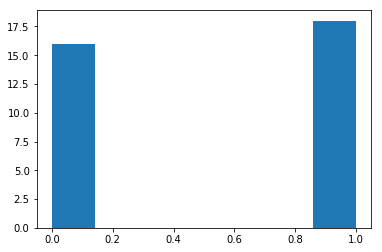

In [9]:
# modularity matrix, max eigenvalue, go to column of eigenvector, 
# split on positives and negatives
from collections import deque

def top_level_clustering(graph, k):
    # Queue for holding and processing communities
    processing_queue = deque([graph])
    # Keep taking community clusters off the front of the queue until we have k clusters
    while len(processing_queue) < k:
        # Take current community off front of the queue
        current_graph = processing_queue.popleft()
        # Cluster popped community into two communities based on modularity
        sub_communities = modularity_clustering_eigh(current_graph)
        # Put two communities you got back onto queue and keep going if number 
        # of communities < k
        processing_queue.append(current_graph.subgraph(sub_communities[0]))
        processing_queue.append(current_graph.subgraph(sub_communities[1]))
    # Return groups of nodes in each community as a list of lists
    return [list(G.nodes()) for G in processing_queue]

def modularity_clustering_eigh(graph):
    # Get graph's adjacency matrix
    A = nx.adjacency_matrix(graph)
    # Compute degree vector
    k = np.array(graph.degree(graph.nodes()))[:,1:].astype(int)
    # Compute degree transpose
    k_transpose = k.transpose()
    # Get number of edges for normalization
    m = graph.number_of_edges()
    # Compute Modularity Matrix
    B = A - ((1/(2*m))*(k*k_transpose))
    # Compute Eigenvalues and Eigenvectors
    l, U = la.eigh(B)
    # Use signs from largest eigenvalue's eigenvector to label each node
    # for community_1 or community_2
    labels = np.ravel(np.sign(U[:,-1]))
    # Make a list of nodes and two community lists to hold the two partitions
    nodes = list(graph.nodes())
    community_1 = []
    community_2 = []
    # Put each node in their respective group based on the labels
    for i in range(len(nodes)):
        if labels[i] > 0:
            community_1.append(nodes[i])
        else:
            community_2.append(nodes[i])
    # Return two community partitions in a tuple
    return community_1, community_2
    

# Print out graph to check clusterings
%time top_level_clustering(G_karate, 2)
modularity_predicted_communities = top_level_clustering(G_karate, 2)
modularity_predicted_labels = util.convert_communities_to_labels(G_karate, modularity_predicted_communities)
plt.hist(modularity_predicted_labels, bins='auto');

# TODO: Visualize Predicted Modularity Clustering Labels

In [10]:
# LCC_modularity_5_labels = modularity_predicted_labels_5[np.array(G_email_LCC.nodes())]
# visualize(G_email_LCC, email_LCC_pos, LCC_modularity_5_labels, "Modularity Clusters on Largest Connected Component (5 communities)");

## 4.2 Spectral Clustering (Possible TODO: Rework to append to Pandas DataFrame)

### 4.2.1 Implementation From Paper
    [1]  Christian Bauckhage.  Numpy / scipy / networkx recipes for data science:  Spectral clustering.  10 2016. 
            https://www.researchgate.net/profile/Christian_Bauckhage/publication/309153198_NumPy_SciPy_NetworkX_Recipes_for_Data_Science_Spectral_Clustering/links/5801026908ae310e0d98aa5f/NumPy-SciPy-NetworkX-Recipes-for-Data-Science-Spectral-Clustering.pdf

CPU times: user 5.47 ms, sys: 2.14 ms, total: 7.61 ms
Wall time: 2.08 ms


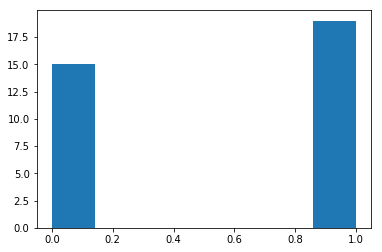

In [11]:
# Revised Implementation from Paper
# | --> Spreads eigenvectors out by taking sign
# | --> Uses more robust clustering library function 
# | -----> downside is more overhead, took super quick matrix operations and introduced Kmeans object
def spectral_cluster(graph, k):
    # Create 'graphs' adjacency matrix
    A = nx.adjacency_matrix(graph)
    # Calculate Degree Matrix from adjacency matrix
    D = np.diag(np.ravel(np.sum(A, axis=1)))
    # Calculate Laplacian from Degree and Adjacency matricies
    L = D - A
    # Compute eigenvalues and eigenvectors of the Laplacian matrix
    eigval, eigvec = la.eigh(L)
    # Spread out the eigenvectors so kmeans can find better clusters
    eigvec = np.array(eigvec)
    eigvec[eigvec < 0] = 0
    eigvec[eigvec > 0] = 1
    if k > 2:
        # Use k-means clustering on the rows of the matrix to extract clusters
        # means, labels = vq.kmeans2(eigvec[:,1:k], k)
        kmeans = KMeans(n_clusters=k, random_state=0).fit(eigvec)
        labels = kmeans.labels_
    else:
        # Grab the "Fiedler" vector (second smallest eigenvalue's eigenvector)
        f = eigvec[:,1]
        # Use f to partition graph by the sign of the scalars in the vector
        labels = np.ravel(np.sign(f))
    # return community labels (0 through k-1)
    return labels

# Print samples
%time spectral_cluster(G_karate, 2)
spectral_predicted_labels = spectral_cluster(G_karate, 2)
spectral_predicted_communities = util.convert_labels_to_communities(spectral_predicted_labels)
plt.hist(spectral_predicted_labels, bins='auto');

Visual stack of ground truth (bottom) against spectral clustered (top)

# TODO: Visualize Predicted Spectral Clustering Labels

In [12]:
# LCC_spectral_42_labels = spectral_predicted_labels[np.array(G_email_LCC.nodes())]
# visualize(G_email_LCC, email_LCC_pos, LCC_spectral_42_labels, "Kmeans Spectral Clusters on Largest Connected Component (42 Communities)");

# TODO: Create function that converts from labels to clusters and vice versa

### 4.2.2 Sci-kit Learn Implementation

In [13]:
from sklearn.cluster import SpectralClustering

clustering_object = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0)

sklearn_spectral_clusters = clustering_object.fit(nx.adjacency_matrix(G_karate))

sklearn_spectral_clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
# Show Spectral Clustering's object properties
sklearn_spectral_clusters 

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=0)

# TODO: Visualize Predicted Modularity Clustering Labels

In [15]:
# LCC_sklearn_spectral_25_labels = sklearn_spectral_clusters.labels_[np.array(G_email_LCC.nodes())]
# visualize(G_email_LCC, email_LCC_pos, LCC_sklearn_spectral_25_labels, "Discretized Spectral Clusters on Largest Connected Component (42 Communities)");

In [16]:
import itertools
from networkx.algorithms.community.centrality import girvan_newman

betweeness_predicted_communities = list(sorted(c) for c in next(girvan_newman(G_karate)))
betweeness_predicted_labels = util.convert_communities_to_labels(G_karate, betweeness_predicted_communities)
betweeness_predicted_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Step 5) Timings

## 5.1 Modularity Clustering

In [17]:
%timeit top_level_clustering(G_karate, 2)

1.01 ms ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 5.2 Spectral Clustering

In [18]:
%timeit spectral_cluster(G_karate, 2)

912 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%timeit clustering_object.fit(nx.adjacency_matrix(G_karate))

4.77 ms ± 26.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 5.3 Betweeness Clustering

In [20]:
%timeit list(sorted(c) for c in next(girvan_newman(G_karate)))

57.5 ms ± 13.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Step 6) Modularity Scores For Optimal Community Sizes

First we look at the ground truth modularity score

In [21]:
from networkx.algorithms.community.quality import modularity
ground_truth_modularity_scores = modularity(G_karate, ground_truth_communities)
ground_truth_modularity_scores_series = pd.Series(ground_truth_modularity_scores, index=pd.RangeIndex(1,20))
print("Ground Truth Label's Modularity Score = %.5f" % ground_truth_modularity_scores)
ground_truth_modularity_scores_series

Ground Truth Label's Modularity Score = 0.35823


1     0.358235
2     0.358235
3     0.358235
4     0.358235
5     0.358235
6     0.358235
7     0.358235
8     0.358235
9     0.358235
10    0.358235
11    0.358235
12    0.358235
13    0.358235
14    0.358235
15    0.358235
16    0.358235
17    0.358235
18    0.358235
19    0.358235
dtype: float64

## 6.1 Predicted Modularity Clusters' Modularity Score

Modularity score for a single # of communities (42 in this case)

In [22]:
modularity(G_karate, modularity_predicted_communities)

0.37146614069690825

In [23]:
modularity_predicted_modularity_scores = [modularity(G_karate, top_level_clustering(G_karate, k)) for k in range(1,20)]
modularity_predicted_modularity_scores_series = pd.Series(modularity_predicted_modularity_scores, index=pd.RangeIndex(1,20))
modularity_predicted_modularity_scores_series

1     1.423363e-17
2     3.714661e-01
3     3.726989e-01
4     3.934089e-01
5     3.610289e-01
6     3.452498e-01
7     2.935569e-01
8     2.669297e-01
9     2.496713e-01
10    2.496713e-01
11    2.496713e-01
12    2.237015e-01
13    2.074293e-01
14    1.980605e-01
15    1.980605e-01
16    1.874589e-01
17    1.874589e-01
18    1.874589e-01
19    1.874589e-01
dtype: float64

## 6.2 Predicted Spectral Clusters' Modularity Score

#### Written using kmeans implementation

In [24]:
modularity(G_karate, spectral_predicted_communities)

0.359960552268243

In [25]:
spectral_predicted_modularity_scores = [modularity(G_karate, util.convert_labels_to_communities(spectral_cluster(G_karate, k))) for k in range(1,20)]
spectral_predicted_modularity_scores_series = pd.Series(spectral_predicted_modularity_scores, index=pd.RangeIndex(1,20))
spectral_predicted_modularity_scores_series

1     0.359961
2     0.359961
3    -0.076923
4     0.037886
5     0.116946
6     0.022682
7     0.122288
8    -0.006739
9     0.019888
10   -0.010766
11    0.019806
12    0.037311
13   -0.042817
14    0.036571
15    0.009944
16   -0.025805
17   -0.021696
18   -0.006986
19   -0.010437
dtype: float64

#### Written using discretized implementation

In [26]:
# modularity(G_email, sklearn_spectral_communities)

In [27]:
sklearn_spectral_communities = [util.convert_labels_to_communities(SpectralClustering(n_clusters=k,assign_labels="discretize",random_state=0).fit(nx.adjacency_matrix(G_karate)).labels_) for k in range(1, 20)] 
sklearn_predicted_modularity_scores = [modularity(G_karate, sklearn_spectral_communities[k]) for k in range(len(sklearn_spectral_communities))]
sklearn_predicted_modularity_scores_series = pd.Series(sklearn_predicted_modularity_scores, index=pd.RangeIndex(1,20))
sklearn_predicted_modularity_scores_series

1     1.423363e-17
2     3.714661e-01
3     3.990796e-01
4     3.401545e-01
5     1.540105e-01
6     1.540105e-01
7     5.999343e-02
8     2.958580e-02
9     3.205128e-03
10    3.205128e-03
11    5.177515e-03
12    7.782709e-02
13    7.782709e-02
14    7.782709e-02
15    4.807692e-02
16    7.782709e-02
17    3.369494e-03
18    7.782709e-02
19    7.782709e-02
dtype: float64

In [28]:
k = 19
betweeness_predicted_modularity_scores = [modularity(G_karate, list(sorted(c) for c in communities)) for communities in itertools.islice(girvan_newman(G_karate), k)]
betweeness_predicted_modularity_scores_series = pd.Series(betweeness_predicted_modularity_scores, index=pd.RangeIndex(1,20))
betweeness_predicted_modularity_scores_series

1     0.359961
2     0.348784
3     0.363248
4     0.401298
5     0.392505
6     0.376233
7     0.358317
8     0.341716
9     0.324786
10    0.315911
11    0.298652
12    0.280408
13    0.262821
14    0.247535
15    0.226824
16    0.208909
17    0.189842
18    0.181295
19    0.160092
dtype: float64

## 6.3 Comparison Between Spectral and Modularity Clustering

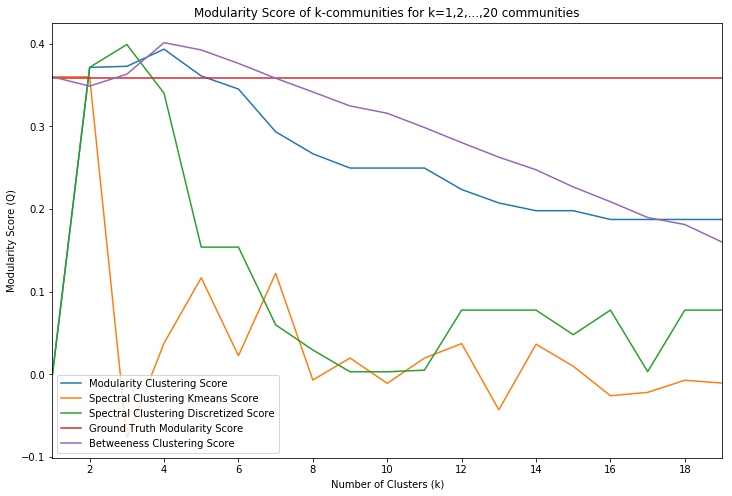

modularity clustering max k = 4 Q – 0.39340894148586364
spectral clustering max k = 1 Q – 0.359960552268243
sklearn spectral clustering max k = 3 Q – 0.3990795529257052
betweeness spectral clustering max k = 4 Q – 0.4012984878369489


In [46]:
ax = modularity_predicted_modularity_scores_series.plot(kind='line', figsize=(12,8), use_index=True, label='Modularity Clustering Score')

ax = spectral_predicted_modularity_scores_series.plot(kind='line', figsize=(12,8), use_index=True, label='Spectral Clustering Kmeans Score')

ax = sklearn_predicted_modularity_scores_series.plot(kind='line', figsize=(12,8), use_index=True, label='Spectral Clustering Discretized Score')

ax = ground_truth_modularity_scores_series.plot(kind='line', figsize=(12,8), use_index=True, label='Ground Truth Modularity Score')

ax = betweeness_predicted_modularity_scores_series.plot(kind='line', figsize=(12,8), use_index=True, label='Betweeness Clustering Score')

ax.set(title='Modularity Score of k-communities for k=1,2,...,20 communities', xlabel='Number of Clusters (k)', ylabel='Modularity Score (Q)')
ax.legend()
plt.show()

m_idx = modularity_predicted_modularity_scores_series.idxmax()
s_idx = spectral_predicted_modularity_scores_series.idxmax()
sk_idx = sklearn_predicted_modularity_scores_series.idxmax()
b_idx = betweeness_predicted_modularity_scores_series.idxmax()

print('modularity clustering max k =', m_idx, 'Q –', modularity_predicted_modularity_scores_series[m_idx])
print('spectral clustering max k =', s_idx, 'Q –', spectral_predicted_modularity_scores_series[s_idx])
print('sklearn spectral clustering max k =', sk_idx, 'Q –', sklearn_predicted_modularity_scores_series[sk_idx])
print('betweeness spectral clustering max k =', b_idx, 'Q –', betweeness_predicted_modularity_scores_series[b_idx])

The fact that the modularity clustering and the kmeans spectral clustering both follow that $\frac{1}{x}$ looking line suggests that the two methods are picking up on some underlying structure in the network, its just not the department structure we were looking for.

# Step 7) Investigate Clusters

In [30]:
(ground_truth_labels == modularity_predicted_labels).astype(int).mean()

0.9705882352941176

#### 97% clustering accuracy against ground truth labels for the binary classification of two communities on a small graph!

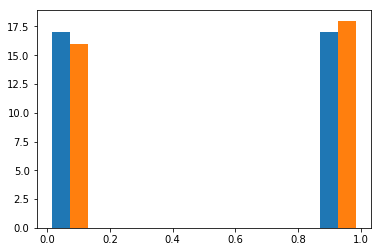

In [31]:
plt.hist([ground_truth_labels, modularity_predicted_labels], bins='auto');

In [32]:
(ground_truth_labels == spectral_predicted_labels).astype(int).mean()

0.9411764705882353

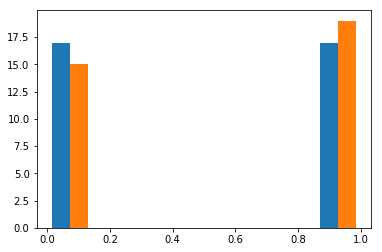

In [33]:
plt.hist([ground_truth_labels, spectral_predicted_labels], bins='auto');

In [34]:
(ground_truth_labels == sklearn_spectral_clusters.labels_).astype(int).mean()

0.9705882352941176

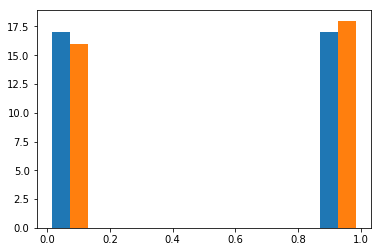

In [35]:
plt.hist([ground_truth_labels, sklearn_spectral_clusters.labels_], bins='auto');

In [36]:
(ground_truth_labels == betweeness_predicted_labels).astype(int).mean()

0.9411764705882353

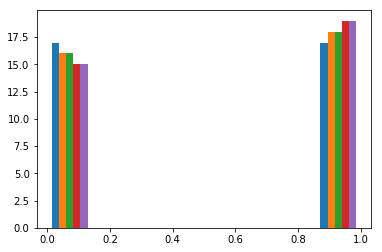

In [37]:
plt.hist([ground_truth_labels, sklearn_spectral_clusters.labels_, modularity_predicted_labels, spectral_predicted_labels, betweeness_predicted_labels], bins='auto');

In [38]:
(modularity_predicted_labels == sklearn_spectral_clusters.labels_).astype(int).mean()

1.0

In [39]:
(spectral_predicted_labels == betweeness_predicted_labels).astype(int).mean()

1.0

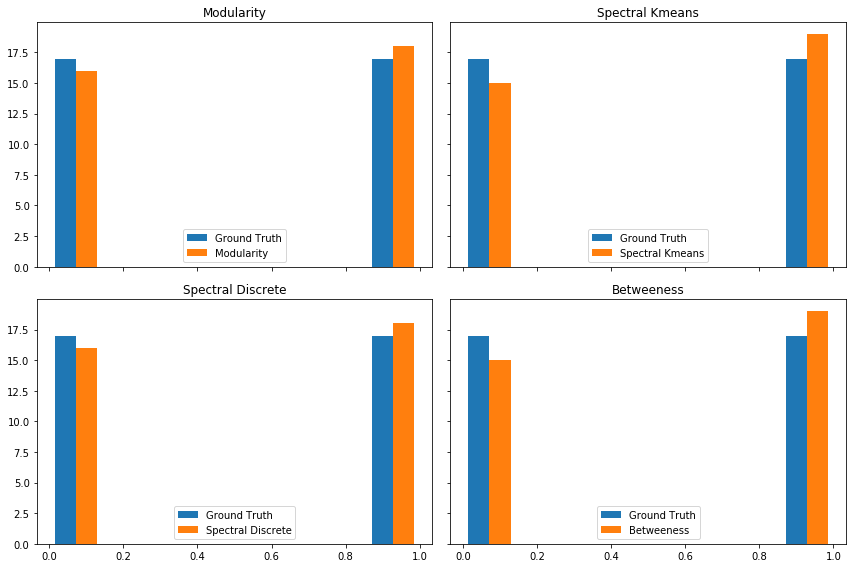

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(12,8))
ax0, ax1, ax2, ax3 = axes.flatten()


ax0.hist([ground_truth_labels, modularity_predicted_labels], bins='auto', histtype='bar', label=['Ground Truth', 'Modularity'])
ax0.legend(prop={'size': 10})
ax0.set_title('Modularity')

ax1.hist([ground_truth_labels, spectral_predicted_labels], bins='auto', histtype='bar', label=['Ground Truth', 'Spectral Kmeans'])
ax1.legend(prop={'size': 10})
ax1.set_title('Spectral Kmeans')

ax2.hist([ground_truth_labels, sklearn_spectral_clusters.labels_], bins='auto', histtype='bar', label=['Ground Truth', 'Spectral Discrete'])
ax2.legend(prop={'size': 10})
ax2.set_title('Spectral Discrete')


ax3.hist([ground_truth_labels, betweeness_predicted_labels], bins='auto', histtype='bar', label=['Ground Truth', 'Betweeness'])
ax3.legend(prop={'size': 10})
ax3.set_title('Betweeness')

fig.tight_layout()
plt.show()

## 6.4 Predicted Betweeness Clusters' Modularity Score

Interestingly enough the modularity clustering and the discritized kmeans clustering output the same clusters

# Actual TODO's
* Measure Average Clustering Coefficients within communities
* Measure Triangle Participation Ratio (TPR)

# Average Clustering Coefficients of Predicted Communities
    The average clustering coefficient for the whole graph is 0.57064

### Modularity Predicted Communities

In [47]:
print('Average Clustering Coefficient For Communities:')
np.array([nx.average_clustering(G_karate.subgraph(community)) for community in modularity_predicted_communities], dtype=np.dtype('f')).mean()

Average Clustering Coefficient For Communities:


0.6856254

### Spectral Predicted Communities

In [48]:
print('Average Clustering Coefficient For Communities:')
np.array([nx.average_clustering(G_karate.subgraph(community)) for community in spectral_predicted_communities], dtype=np.dtype('f')).mean()

Average Clustering Coefficient For Communities:


0.62936056

In [49]:
print('Average Clustering Coefficient For Communities:')
np.array([nx.average_clustering(G_karate.subgraph(community)) for community in util.convert_labels_to_communities(sklearn_spectral_clusters.labels_)], dtype=np.dtype('f')).mean()

Average Clustering Coefficient For Communities:


0.6856254

### Betweeness Predicted Communities

In [50]:
print('Average Clustering Coefficient For Communities:')
np.array([nx.average_clustering(G_karate.subgraph(community)) for community in betweeness_predicted_communities], dtype=np.dtype('f')).mean()

Average Clustering Coefficient For Communities:


0.62936056

# TODO: Error Analysis After DataFrame Rework
Bad error rates don't neccessarily mean failure, because we have to take into account how correlated the communication network is with the department network. You'd guess that employees need to talk to their team and bosses, so their would be a lot of intra-department communication, but maybe the flow out is great enough that clustering methods can no longer pick out the departments.

#### TODO Thoughts
* Finding percentage emails going between departments
* Find percentage of emails going out of specific department vs within department
* Implement Cross Validation by seperating nodes into test and train sets
* Find unique communities per cluster (percentages, total number)
